In [209]:
import numpy as np
import pandas as pd

from sklearn import linear_model, metrics, preprocessing, tree
from sklearn.metrics import r2_score, f1_score, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split ,cross_val_score, GridSearchCV


# visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [49]:
df = pd.read_csv('Marvel Dataframe after drop and fill7.csv')
for col in df.columns:
    if 'Name' in col:
        df.drop(columns = col, inplace=True)
df

,Marital Status,Reality,Gender,Hair Color,Eye Color,Living status,Identity,Citenzenship,Year,Appearnces
0,Single,Earth-616,Male,Brown,Green,Alive,No Dual,American,2018,3
1,Single,Earth-616,Male,Brown,Brown,Alive,No Dual,British,1976,12
2,Single,Earth-199999,Male,Black,Brown,Alive,No Dual,American,2021,3
3,Single,Earth-9047,Male,Brown,Blue,Alive,Public,American,1988,2
4,Single,Earth-41001,Male,Blond,Blue,Alive,Public,American,2008,10
...,...,...,...,...,...,...,...,...,...,...
24499,Single,Earth-616,Male,Brown,Red,Deceased,No Dual,German,1943,1
24500,Single,Earth-TRN517,Male,White,Yellow,Alive,No Dual,Battlerealm,2018,1
24501,Married,Earth-616,Male,Black,Black,Deceased,No Dual,Mongolian,2021,1
24502,Married,Earth-616,Male,No Hair At All,Black,Deceased,No Dual,Unknown,2020,2


In [51]:
df2 = pd.get_dummies(df, prefix=['Gender'], prefix_sep='_', dummy_na=False, columns=['Gender'], drop_first=True)
df3 = pd.get_dummies(df2, prefix=['M Status'], prefix_sep='_', dummy_na=False, columns=['Marital Status'], drop_first=True)
df4 = pd.get_dummies(df3, prefix=['Hair C'], prefix_sep='_', dummy_na=False, columns=['Hair Color'], drop_first=True)
df5 = pd.get_dummies(df4, prefix=['Eye C'], prefix_sep='_', dummy_na=False, columns=['Eye Color'], drop_first=True)
df6 = pd.get_dummies(df5, prefix=['Identity'], prefix_sep='_', dummy_na=False, columns=['Identity'], drop_first=True)
df7 = pd.get_dummies(df6, prefix=['Reality'], prefix_sep='_', dummy_na=False, columns=['Reality'], drop_first=True)
df8 = pd.get_dummies(df7, prefix=['Citenzenship'], prefix_sep='_', dummy_na=False, columns=['Citenzenship'], drop_first=True)


In [50]:
#Feature Engineering

# we Chose to divide into Male, Female and Other
gender_label = ['Male','Female']
gender = df['Gender']
for i,x in enumerate(gender.tolist()):
    if x not in gender_label:
        gender[i] = 'Other'
df['Gender'] = gender

# we Chose to divide into Single, Married which is way above the next status
mstatus_labels = ['Married', 'Single']
mstatus = df['Marital Status']
for i,x in enumerate(mstatus.tolist()):
    if x not in mstatus_labels:
        mstatus[i] = 'Other'
df['Marital Status'] = mstatus

# we Chose to divide into Black, Brown, Blond, No Hair, Red, White which is way above the next one in the chart.
hair_color_labels = ['Black', 'Blond', 'Brown', 'Grey', 'No Hair At All', 'Red', 'White']
hair_color = df['Hair Color']
for i,x in enumerate(hair_color.tolist()):
    if x not in hair_color_labels:
        hair_color[i] = 'Other'
df['Hair Color'] = hair_color

# we Chose to divide into Brown, Blue, Black, Green which represent 84% and Other
eye_color_labels = ['Black', 'Blue', 'Brown','Green']
eye_color = df['Eye Color']
for i,x in enumerate(eye_color.tolist()):
    if x not in eye_color_labels:
        eye_color[i] = 'Other'
df['Eye Color'] = eye_color

# we Chose to divide into American which is more then 50% and American and way above the next Citizenship
citizen_labels = ['American']
citizen = df['Citenzenship']
for i,x in enumerate(citizen.tolist()):
    if x not in citizen_labels:
        citizen[i] = 'Other'
df['Citenzenship'] = citizen

# we Chose to divide into Earth-616 which is more then 50% and Earth-616 and way above the next Reality
reality_label = ['Earth-616']
reality = df['Reality']
for i,x in enumerate(reality.tolist()):
    if x not in reality_label:
        reality[i] = 'Other'
df['Reality'] = reality

C:\Users\guyge\AppData\Local\Temp/ipykernel_87896/575306066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[i] = 'Other'
C:\Users\guyge\AppData\Local\Temp/ipykernel_87896/575306066.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mstatus[i] = 'Other'
C:\Users\guyge\AppData\Local\Temp/ipykernel_87896/575306066.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair_color[i] = 'Other'
C:\Users\guyge\AppData\Local\Temp/ip

In [52]:
replace_map = {'Alive': 1,'Deceased': 0 }
df8.replace(replace_map, inplace = True)

In [53]:
df8

,Living status,Year,Appearnces,Gender_Male,Gender_Other,M Status_Other,M Status_Single,Hair C_Blond,Hair C_Brown,Hair C_Grey,...,Hair C_White,Eye C_Blue,Eye C_Brown,Eye C_Green,Eye C_Other,Identity_No Dual,Identity_Public,Identity_Secret,Reality_Other,Citenzenship_Other
0,1,2018,3,1,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,1,1976,12,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,1,2021,3,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,1,1988,2,1,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,1,2008,10,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24499,0,1943,1,1,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
24500,1,2018,1,1,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,1,1
24501,0,2021,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
24502,0,2020,2,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


<AxesSubplot:xlabel='Year', ylabel='Living status'>

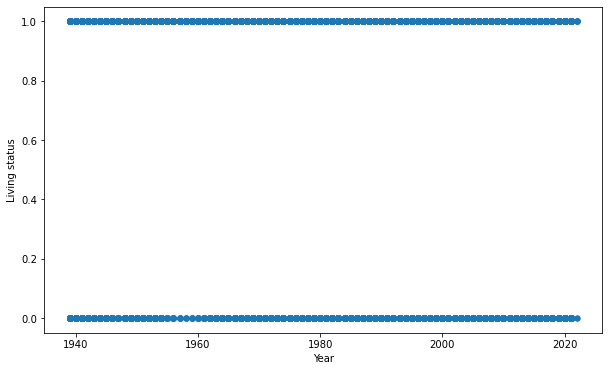

In [167]:
df8.plot.scatter(x='Year',y='Living status',s=30)

<AxesSubplot:xlabel='Appearnces', ylabel='Living status'>

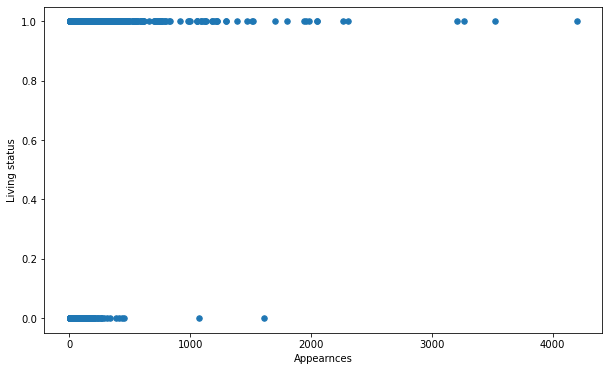

In [168]:
df8.plot.scatter(x='Appearnces',y='Living status',s=30)

In [54]:
categorys_to_predict = ['Living status']

X = df8.drop(columns = categorys_to_predict)
y = df8[categorys_to_predict]

In [55]:
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    return X_train, X_test, y_train, y_test

In [78]:
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y, 0.2, 42)

In [79]:
X_train,y_train,X_test,y_test

(       Year  Appearnces  Gender_Male  Gender_Other  M Status_Other  \
 20185  2008          23            0             0               0   
 8900   1999           5            1             0               0   
 4641   1960           1            1             0               0   
 1730   1964          92            1             0               0   
 11449  1939           1            1             0               0   
 ...     ...         ...          ...           ...             ...   
 21575  1978          44            0             0               1   
 5390   1967         215            1             0               0   
 860    2020           1            1             0               0   
 15795  2015           2            1             0               0   
 23654  1988           2            1             0               0   
 
        M Status_Single  Hair C_Blond  Hair C_Brown  Hair C_Grey  \
 20185                1             0             0            0   
 8900     

In [199]:
model = linear_model.LogisticRegression().fit(X_train, y_train.values.ravel())

ValueError: X has 1 features per sample; expecting 22

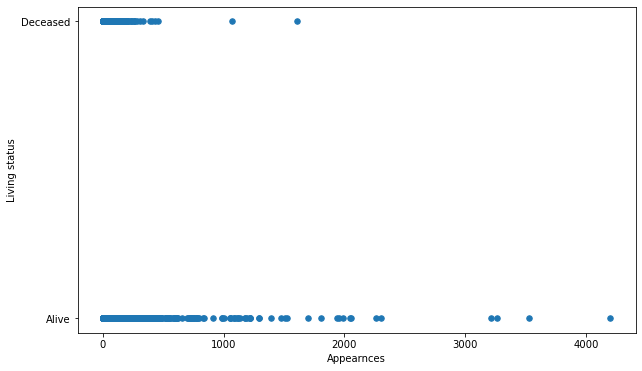

In [208]:
df.plot.scatter(x='Appearnces',y='Living status',s=30)

#create a set of points along the x axis to print prediction graph
x = np.linspace(df['Appearnces'].min(),df['Appearnces'].max(),1000)

#get probabilistic predictions for those points (using predict_proba)
y_pred_p = model.predict_proba(x.reshape(-1,1)) # we need to reshape x to get it to a 2 dimensional array

#get only the probability for the "pass" category
y_pred_p1 = [y[1] for y in y_pred_p]

#plot the prediction graph
plt.plot(x,y_pred_p1,color ='Black')

# this is an alternative plot option to calculate directly the predicted value, using the model paramters and avoiding predict_proba function
# you can uncomment the line below, and comment the line before and see the results
#plt.plot(x,expit(lrm.intercept_[0]+lrm.coef_[0][0]*x),color='green')

# draw the line of y=0.5 as the decision point
plt.plot(x,[0.5]*len(x),color = "red")
plt.show()

In [81]:
# Arranging predicted data sides to actual data:
predicted_results = model.predict(X_test)

predicted = []

for result in predicted_results:
    predicted.append(result)
    
df_result = pd.DataFrame(columns=['ACTUAL','PREDICTED'])
                              
df_result['ACTUAL'] = y_test['Living status']
                              
df_result['PREDICTED'] = predicted

# Displaying results:
df_result

,ACTUAL,PREDICTED
7884,1,1
13005,1,1
11339,0,1
6049,1,1
8642,1,1
...,...,...
20330,1,1
7447,1,1
20019,0,1
2277,0,1


In [82]:
print("accuracy is:",metrics.accuracy_score(df_result['ACTUAL'], df_result['PREDICTED']))
print("precision is:",metrics.precision_score(df_result['ACTUAL'], df_result['PREDICTED']))
print("recall is:",metrics.recall_score(df_result['ACTUAL'], df_result['PREDICTED']))
print("f1 is:",metrics.f1_score(df_result['ACTUAL'],df_result['PREDICTED']))

accuracy is: 0.74617425015303
precision is: 0.74617425015303
recall is: 1.0
f1 is: 0.854638934330451


In [188]:
knn_model = KNeighborsClassifier(n_neighbors=25).fit(X_train, y_train.values.ravel())

In [189]:

y_pred = knn_model.predict(X_test)

print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

[[  80 1164]
 [ 101 3556]]


In [190]:
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy =  0.7418894103244236


In [146]:
Accuracy =  0.7435217302591308

In [191]:
scores = cross_val_score(knn_model, X, y.values.ravel())
scores

array([0.72556621, 0.72230157, 0.72862681, 0.72883085, 0.72081633])

In [192]:
print("Accuracy: %0.2f" % scores.mean())

Accuracy: 0.73


In [197]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=300, random_state=0)

trained_forest = forest.fit(X_train, y_train.values.ravel()) 

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data=  0.9608223231138091
Accuracy on test data=  0.6908794123648235


In [211]:
# Instantiate the classifier
gnb = GaussianNB().fit(X_train,y_train.values.ravel())


y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

# Print results
print('Accuracy on Train data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on Train data=  0.5967453961128398
Accuracy on test data=  0.612119975515201
